In [44]:
import pandas as pd
import numpy as np
from pandas import ExcelFile
import datetime as dt
import matplotlib.pyplot as plt

In [45]:
#Overarching objective: view the average number of 2's vs 3's taken by big men (power forwards
#and centers) from 2000 to 2017

hoops_data = pd.read_excel("NBA+Data.xlsx", sheetname ="NBA+Data")
hoops_data.head()


C:\Users\andre\Anaconda3_second_attempt\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [46]:
#isolating only the years 2000-2017

hoops_data = hoops_data[hoops_data.Year >= 2000]
hoops_data.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14470,2000.0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
14471,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
14472,2000.0,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0
14473,2000.0,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
14474,2000.0,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,0.773,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0
14475,2000.0,Ray Allen,SG,24.0,MIL,82.0,82.0,3070.0,20.6,0.570,...,0.887,83.0,276.0,359.0,308.0,110.0,19.0,183.0,187.0,1809.0
14476,2000.0,Rafer Alston,PG,23.0,MIL,27.0,0.0,361.0,4.3,0.310,...,0.750,5.0,18.0,23.0,70.0,12.0,0.0,29.0,29.0,60.0
14477,2000.0,John Amaechi,C,29.0,ORL,80.0,53.0,1684.0,13.2,0.505,...,0.766,62.0,204.0,266.0,95.0,35.0,37.0,139.0,161.0,836.0
14478,2000.0,Derek Anderson,SG,25.0,LAC,64.0,58.0,2201.0,16.9,0.542,...,0.877,80.0,178.0,258.0,220.0,90.0,11.0,167.0,149.0,1080.0
14479,2000.0,Kenny Anderson,PG,29.0,BOS,82.0,82.0,2593.0,17.4,0.524,...,0.775,55.0,170.0,225.0,420.0,139.0,8.0,130.0,230.0,1149.0


In [47]:
#finding all different ways big men are listed (anything w/ C or PF)
hoops_data['Pos'].unique()

array(['SG', 'SF', 'PG', 'C', 'PF', 'SF-SG', 'SF-PF', 'PF-SF', 'C-PF',
       'SG-PG', 'PG-SG', 'SG-SF', 'PF-C', 'PG-SF', 'SG-PF', 'C-SF'],
      dtype=object)

In [48]:
#creating a variable for ever different position
c = hoops_data.loc[hoops_data['Pos'] == 'C']
pf = hoops_data.loc[hoops_data['Pos'] == 'PF']
sf_pf = hoops_data.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf = hoops_data.loc[hoops_data['Pos'] == 'PF-SF']
c_pf = hoops_data.loc[hoops_data['Pos'] == 'C-PF']
pf_c = hoops_data.loc[hoops_data['Pos'] == 'PF-C']
sg_pf = hoops_data.loc[hoops_data['Pos'] == 'SG-PF']
c_sf = hoops_data.loc[hoops_data['Pos'] == 'C-SF']

In [118]:
print(c_sf)

         Year       Player   Pos   Age   Tm     G   GS     MP  PER    TS%  \
19037  2008.0  Bobby Jones  C-SF  24.0  TOT  47.0  2.0  531.0  9.9  0.548   

       ...      FT%   ORB   DRB   TRB   AST   STL  BLK   TOV    PF    PTS  
19037  ...    0.784  29.0  63.0  92.0  28.0  15.0  3.0  28.0  85.0  178.0  

[1 rows x 52 columns]


In [49]:
#creating the mean 2 pt attempts for each position, including all of '00-'17
c_mean = c['2PA'].mean()
pf_mean = pf['2PA'].mean()
sf_pf_mean = sf_pf['2PA'].mean()
pf_sf_mean = pf_sf['2PA'].mean()
c_pf_mean = c_pf['2PA'].mean()
pf_c_mean = pf_c['2PA'].mean()
sg_pf_mean = sg_pf['2PA'].mean()
c_sf_mean = c_sf['2PA'].mean()

In [50]:
#creating a DF for the values to sit into
gross_mean_df = pd.DataFrame({'C':c_mean, "PF": pf_mean, 
                            "SF/PF": sf_pf_mean, 'PF/SF': pf_sf_mean,
                             'C/PF': c_pf_mean, 'PF/C': pf_c_mean,
                             'SG/PF': sg_pf_mean, 'C/SF': c_sf_mean},
                             index = [0])
gross_mean_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,278.197052,318.230288,292.0,238.529412,234.0,241.733333,643.333333,87.0


In [51]:
#plotting the data just as a starting point
#this plot is useless, but it's a step in the right direction

#the way I'm referring to the DF is on the right path.  I dont want to 
#have type out every value for every year.  This code might get there
#eventually.  The cell below has the long, but effective, way. 
height = 
ind = np.arange(len(gross_mean_df))
width = .35

plt.bar(ind, height, align = 'center', alpha = .5)
plt.xticks(ind)
plt.ylabel('Shots taken')
plt.title('Shots by Bigs')

plt.show()

SyntaxError: invalid syntax (<ipython-input-51-86c3cff53cbf>, line 7)

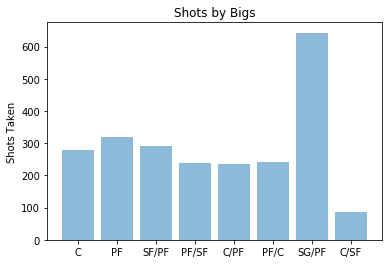

In [92]:
height = [278,318,292,238,234,241,643,87]
x = ('C', 'PF', 'SF/PF','PF/SF','C/PF','PF/C','SG/PF','C/SF')
x_pos = len(x)
width = .35

plt.bar(x, height, align = 'center', alpha = .5)
plt.xticks(x)
plt.ylabel("Shots Taken")
plt.title("Shots by Bigs")

plt.show()

In [138]:
# trying to isolate 2001 the same way I isolated '00-'17
hoops_data_2001 = hoops_data[hoops_data.Year == 2001]
hoops_data_2002 = hoops_data[hoops_data.Year == 2002]
hoops_data_2003 = hoops_data[hoops_data.Year == 2003]
hoops_data_2004 = hoops_data[hoops_data.Year == 2004]
hoops_data_2005 = hoops_data[hoops_data.Year == 2005]
hoops_data_2006 = hoops_data[hoops_data.Year == 2006]
hoops_data_2007 = hoops_data[hoops_data.Year == 2007]
hoops_data_2008 = hoops_data[hoops_data.Year == 2008]
hoops_data_2009 = hoops_data[hoops_data.Year == 2009]
hoops_data_2010 = hoops_data[hoops_data.Year == 2010]
hoops_data_2011 = hoops_data[hoops_data.Year == 2011]
hoops_data_2012 = hoops_data[hoops_data.Year == 2012]
hoops_data_2013 = hoops_data[hoops_data.Year == 2013]
hoops_data_2014 = hoops_data[hoops_data.Year == 2014]
hoops_data_2015 = hoops_data[hoops_data.Year == 2015]
hoops_data_2016 = hoops_data[hoops_data.Year == 2016]
hoops_data_2017 = hoops_data[hoops_data.Year == 2017]
hoops_data_2000 = hoops_data[hoops_data.Year == 2000]

In [76]:
# I should have done all of this for '00 first.  Will be at the end instead.
#creating a variable for big men in '01
c_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'C']
pf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'PF']
sf_pf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'C-PF']
pf_c_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '01
c_mean_01 = c_01['2PA'].mean()
pf_mean_01 = pf_01['2PA'].mean()
sf_pf_mean_01 = sf_pf_01['2PA'].mean()
pf_sf_mean_01 = pf_sf_01['2PA'].mean()
c_pf_mean_01 = c_pf_01['2PA'].mean()
pf_c_mean_01 = pf_c_01['2PA'].mean()
sg_pf_mean_01 = sg_pf_01['2PA'].mean()
c_sf_mean_01 = c_sf_01['2PA'].mean()

In [77]:
#turning # of 2's (mean) in a DF
two_pters_taken_mean_01_df = pd.DataFrame({'C':c_mean_01, "PF": pf_mean_01, 
                            "SF/PF": sf_pf_mean_01, 'PF/SF': pf_sf_mean_01,
                             'C/PF': c_pf_mean_01, 'PF/C': pf_c_mean_01,
                             'SG/PF': sg_pf_mean_01, 'C/SF': c_sf_mean_01},
                             index = [0])

#trying to drop the NaN values and not have to manualy do the mean calc.
two_pters_taken_mean_01_df_drop = two_pters_taken_mean_01_df.dropna(how = 'all')
two_pters_taken_mean_01_df_drop
#tried and failed.  manual math it is. 

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,280.743119,361.388889,NaN,NaN,538.0,NaN,NaN,NaN


In [81]:
two_pt_att_mean_01 = (c_mean_01 + pf_mean_01 + c_pf_mean_01) / 3
two_pt_att_mean_01

393.37733605164794

In [75]:
#moving on to 2002
#creating a variable for big men in '02
c_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'C']
pf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'PF']
sf_pf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'C-PF']
pf_c_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '02
c_mean_02 = c_02['2PA'].mean()
pf_mean_02 = pf_02['2PA'].mean()
sf_pf_mean_02 = sf_pf_02['2PA'].mean()
pf_sf_mean_02 = pf_sf_02['2PA'].mean()
c_pf_mean_02 = c_pf_02['2PA'].mean()
pf_c_mean_02 = pf_c_02['2PA'].mean()
sg_pf_mean_02 = sg_pf_02['2PA'].mean()
c_sf_mean_02 = c_sf_02['2PA'].mean()

In [82]:
two_pters_taken_mean_02_df = pd.DataFrame({'C':c_mean_02, "PF": pf_mean_02, 
                            "SF/PF": sf_pf_mean_02, 'PF/SF': pf_sf_mean_02,
                             'C/PF': c_pf_mean_02, 'PF/C': pf_c_mean_02,
                             'SG/PF': sg_pf_mean_02, 'C/SF': c_sf_mean_02},
                             index = [0])
two_pters_taken_mean_02_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,282.33945,377.595745,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
two_pt_att_mean_02 = (c_mean_02 + pf_mean_02) / 2
two_pt_att_mean_02

329.96759711106773

In [85]:
#moving on to 2003
#creating a variable for big men in '03
c_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'C']
pf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'PF']
sf_pf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'C-PF']
pf_c_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '03
c_mean_03 = c_03['2PA'].mean()
pf_mean_03 = pf_03['2PA'].mean()
sf_pf_mean_03 = sf_pf_03['2PA'].mean()
pf_sf_mean_03 = pf_sf_03['2PA'].mean()
c_pf_mean_03 = c_pf_03['2PA'].mean()
pf_c_mean_03 = pf_c_03['2PA'].mean()
sg_pf_mean_03 = sg_pf_03['2PA'].mean()
c_sf_mean_03 = c_sf_03['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_03_df = pd.DataFrame({'C':c_mean_03, "PF": pf_mean_03, 
                            "SF/PF": sf_pf_mean_03, 'PF/SF': pf_sf_mean_03,
                             'C/PF': c_pf_mean_03, 'PF/C': pf_c_mean_03,
                             'SG/PF': sg_pf_mean_03, 'C/SF': c_sf_mean_03},
                             index = [0])
two_pters_taken_mean_03_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,283.981308,374.164835,729.0,NaN,NaN,NaN,NaN,NaN


In [87]:
two_pt_att_mean_03 = (c_mean_03 + pf_mean_03 + sf_pf_mean_03) / 3
two_pt_att_mean_03

462.3820478586834

In [99]:
#moving on to 2004
#creating a variable for big men in '04
c_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'C']
pf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'PF']
sf_pf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'C-PF']
pf_c_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '03
c_mean_04 = c_04['2PA'].mean()
pf_mean_04 = pf_04['2PA'].mean()
sf_pf_mean_04 = sf_pf_04['2PA'].mean()
pf_sf_mean_04 = pf_sf_04['2PA'].mean()
c_pf_mean_04 = c_pf_04['2PA'].mean()
pf_c_mean_04 = pf_c_04['2PA'].mean()
sg_pf_mean_04 = sg_pf_04['2PA'].mean()
c_sf_mean_04 = c_sf_04['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_04_df = pd.DataFrame({'C':c_mean_04, "PF": pf_mean_04, 
                            "SF/PF": sf_pf_mean_04, 'PF/SF': pf_sf_mean_04,
                             'C/PF': c_pf_mean_04, 'PF/C': pf_c_mean_04,
                             'SG/PF': sg_pf_mean_04, 'C/SF': c_sf_mean_04},
                             index = [0])
two_pters_taken_mean_04_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,232.125984,337.984252,NaN,324.0,129.4,174.5,NaN,NaN


In [100]:
two_pt_att_mean_04 = (c_mean_04 + pf_mean_04 + pf_sf_mean_04 + 
                      c_pf_mean_04 + pf_c_mean_04) / 5
two_pt_att_mean_04

239.6020472440945

In [101]:
#2005
#creating a variable for big men in '05
c_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'C']
pf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'PF']
sf_pf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'C-PF']
pf_c_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '03
c_mean_05 = c_05['2PA'].mean()
pf_mean_05 = pf_05['2PA'].mean()
sf_pf_mean_05 = sf_pf_05['2PA'].mean()
pf_sf_mean_05 = pf_sf_05['2PA'].mean()
c_pf_mean_05 = c_pf_05['2PA'].mean()
pf_c_mean_05 = pf_c_05['2PA'].mean()
sg_pf_mean_05 = sg_pf_05['2PA'].mean()
c_sf_mean_05 = c_sf_05['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_05_df = pd.DataFrame({'C':c_mean_05, "PF": pf_mean_05, 
                            "SF/PF": sf_pf_mean_05, 'PF/SF': pf_sf_mean_05,
                             'C/PF': c_pf_mean_05, 'PF/C': pf_c_mean_05,
                             'SG/PF': sg_pf_mean_05, 'C/SF': c_sf_mean_05},
                             index = [0])
two_pters_taken_mean_05_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,244.239669,346.008264,352.0,215.0,191.8,239.0,NaN,NaN


In [102]:
two_pt_att_mean_05 = (c_mean_05 + pf_mean_05 + sf_pf_mean_05 + pf_sf_mean_05
                     + c_pf_mean_05 + pf_c_mean_05) / 6
two_pt_att_mean_05

264.6746556473829

In [108]:
#2006
#creating a variable for big men in '06
c_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'C']
pf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'PF']
sf_pf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'C-PF']
pf_c_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '03
c_mean_06 = c_06['2PA'].mean()
pf_mean_06 = pf_06['2PA'].mean()
sf_pf_mean_06 = sf_pf_06['2PA'].mean()
pf_sf_mean_06 = pf_sf_06['2PA'].mean()
c_pf_mean_06 = c_pf_06['2PA'].mean()
pf_c_mean_06 = pf_c_06['2PA'].mean()
sg_pf_mean_06 = sg_pf_06['2PA'].mean()
c_sf_mean_06 = c_sf_06['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_06_df = pd.DataFrame({'C':c_mean_06, "PF": pf_mean_06, 
                            "SF/PF": sf_pf_mean_06, 'PF/SF': pf_sf_mean_06,
                             'C/PF': c_pf_mean_06, 'PF/C': pf_c_mean_06,
                             'SG/PF': sg_pf_mean_06, 'C/SF': c_sf_mean_06},
                             index = [0])
two_pters_taken_mean_06_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,226.113821,360.557692,34.0,120.333333,276.0,174.5,NaN,NaN


In [109]:
two_pt_att_mean_06 = (c_mean_06 + pf_mean_06 + sf_pf_mean_06 + pf_sf_mean_06
                     + c_pf_mean_06 + pf_c_mean_06) / 6
two_pt_att_mean_06

198.58414112987285

In [110]:
#2007
#creating a variable for big men in '07
c_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'C']
pf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'PF']
sf_pf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'C-PF']
pf_c_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '07
c_mean_07 = c_07['2PA'].mean()
pf_mean_07 = pf_07['2PA'].mean()
sf_pf_mean_07 = sf_pf_07['2PA'].mean()
pf_sf_mean_07 = pf_sf_07['2PA'].mean()
c_pf_mean_07 = c_pf_07['2PA'].mean()
pf_c_mean_07 = pf_c_07['2PA'].mean()
sg_pf_mean_07 = sg_pf_07['2PA'].mean()
c_sf_mean_07 = c_sf_07['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_07_df = pd.DataFrame({'C':c_mean_07, "PF": pf_mean_07, 
                            "SF/PF": sf_pf_mean_07, 'PF/SF': pf_sf_mean_07,
                             'C/PF': c_pf_mean_07, 'PF/C': pf_c_mean_07,
                             'SG/PF': sg_pf_mean_07, 'C/SF': c_sf_mean_07},
                             index = [0])
two_pters_taken_mean_07_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,315.381443,285.460317,NaN,NaN,NaN,80.0,626.0,NaN


In [111]:
two_pt_att_mean_07 = (c_mean_07 + pf_mean_07 + pf_c_mean_07 + sg_pf_mean_07) / 4
two_pt_att_mean_07

326.7104401898216

In [112]:
#2008
#creating a variable for big men in '08
c_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'C']
pf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'PF']
sf_pf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'C-PF']
pf_c_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '07
c_mean_08 = c_08['2PA'].mean()
pf_mean_08 = pf_08['2PA'].mean()
sf_pf_mean_08 = sf_pf_08['2PA'].mean()
pf_sf_mean_08 = pf_sf_08['2PA'].mean()
c_pf_mean_08 = c_pf_08['2PA'].mean()
pf_c_mean_08 = pf_c_08['2PA'].mean()
sg_pf_mean_08 = sg_pf_08['2PA'].mean()
c_sf_mean_08 = c_sf_08['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_08_df = pd.DataFrame({'C':c_mean_08, "PF": pf_mean_08, 
                            "SF/PF": sf_pf_mean_08, 'PF/SF': pf_sf_mean_08,
                             'C/PF': c_pf_mean_08, 'PF/C': pf_c_mean_08,
                             'SG/PF': sg_pf_mean_08, 'C/SF': c_sf_mean_08},
                             index = [0])
two_pters_taken_mean_08_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,278.15748,285.752,166.0,45.5,275.666667,NaN,279.0,87.0


In [113]:
two_pt_att_mean_08 = (c_mean_08 + pf_mean_08 + sf_pf_mean_08 + pf_sf_mean_08
                     +c_pf_mean_08 + sg_pf_mean_08 + c_sf_mean_08) / 7
two_pt_att_mean_08

202.4394495688039

In [114]:
#2009
#creating a variable for big men in '09
c_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'C']
pf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'PF']
sf_pf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'C-PF']
pf_c_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '07
c_mean_09 = c_09['2PA'].mean()
pf_mean_09 = pf_09['2PA'].mean()
sf_pf_mean_09 = sf_pf_09['2PA'].mean()
pf_sf_mean_09 = pf_sf_09['2PA'].mean()
c_pf_mean_09 = c_pf_09['2PA'].mean()
pf_c_mean_09 = pf_c_09['2PA'].mean()
sg_pf_mean_09 = sg_pf_09['2PA'].mean()
c_sf_mean_09 = c_sf_09['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_09_df = pd.DataFrame({'C':c_mean_09, "PF": pf_mean_09, 
                            "SF/PF": sf_pf_mean_09, 'PF/SF': pf_sf_mean_09,
                             'C/PF': c_pf_mean_09, 'PF/C': pf_c_mean_09,
                             'SG/PF': sg_pf_mean_09, 'C/SF': c_sf_mean_09},
                             index = [0])
two_pters_taken_mean_09_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,277.460317,291.798319,135.5,390.0,NaN,491.0,NaN,NaN


In [119]:
two_pt_att_mean_09 = (c_mean_09 + pf_mean_09 + sf_pf_mean_09 + 
                      pf_c_mean_09 + pf_sf_mean_09) / 5
two_pt_att_mean_09

317.15172735760973

In [120]:
#Note to self: Starting in 2010 I'm excluding C/SF & SG/PF from being 'Bigs'
#2010
#creating a variable for big men in '10
c_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'C']
pf_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'PF']
sf_pf_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'C-PF']
pf_c_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_10 = c_10['2PA'].mean()
pf_mean_10 = pf_10['2PA'].mean()
sf_pf_mean_10 = sf_pf_10['2PA'].mean()
pf_sf_mean_10 = pf_sf_10['2PA'].mean()
c_pf_mean_10 = c_pf_10['2PA'].mean()
pf_c_mean_10 = pf_c_10['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_10_df = pd.DataFrame({'C':c_mean_10, "PF": pf_mean_10, 
                            "SF/PF": sf_pf_mean_10, 'PF/SF': pf_sf_mean_10,
                             'C/PF': c_pf_mean_10, 'PF/C': pf_c_mean_10},
                             index = [0])
two_pters_taken_mean_10_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C
0,300.28972,336.589744,NaN,230.0,594.0,329.666667


In [121]:
two_pt_att_mean_10 = (c_mean_10 + pf_mean_10 + pf_sf_mean_10 + c_pf_mean_10
                     + pf_c_mean_10) / 5
two_pt_att_mean_10

358.1092259765157

In [122]:
#2011
#creating a variable for big men in '11
c_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'C']
pf_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'PF']
sf_pf_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'C-PF']
pf_c_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_11 = c_11['2PA'].mean()
pf_mean_11 = pf_11['2PA'].mean()
sf_pf_mean_11 = sf_pf_11['2PA'].mean()
pf_sf_mean_11 = pf_sf_11['2PA'].mean()
c_pf_mean_11 = c_pf_11['2PA'].mean()
pf_c_mean_11 = pf_c_11['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_11_df = pd.DataFrame({'C':c_mean_11, "PF": pf_mean_11, 
                            "SF/PF": sf_pf_mean_11, 'PF/SF': pf_sf_mean_11,
                             'C/PF': c_pf_mean_11, 'PF/C': pf_c_mean_11},
                             index = [0])
two_pters_taken_mean_11_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C
0,258.268657,329.324324,455.0,478.0,180.5,NaN


In [123]:
two_pt_att_mean_11 = (c_mean_11 + pf_mean_11 + sf_pf_mean_11 + pf_sf_mean_11
                      +c_pf_mean_11) / 5
two_pt_att_mean_11

340.2185962081484

In [124]:
#2012
#creating a variable for big men in '12
c_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'C']
pf_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'PF']
sf_pf_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'C-PF']
pf_c_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_12 = c_12['2PA'].mean()
pf_mean_12 = pf_12['2PA'].mean()
sf_pf_mean_12 = sf_pf_12['2PA'].mean()
pf_sf_mean_12 = pf_sf_12['2PA'].mean()
c_pf_mean_12 = c_pf_12['2PA'].mean()
pf_c_mean_12 = pf_c_12['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_12_df = pd.DataFrame({'C':c_mean_12, "PF": pf_mean_12, 
                            "SF/PF": sf_pf_mean_12, 'PF/SF': pf_sf_mean_12,
                             'C/PF': c_pf_mean_12, 'PF/C': pf_c_mean_12},
                             index = [0])
two_pters_taken_mean_12_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C
0,204.165289,297.084906,86.0,45.0,61.0,NaN


In [125]:
two_pt_att_mean_12 = (c_mean_12 + pf_mean_12 + sf_pf_mean_12 + pf_sf_mean_12
                     + c_pf_mean_12) / 5
two_pt_att_mean_12

138.65003898331514

In [126]:
#2013
#creating a variable for big men in '13
c_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'C']
pf_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'PF']
sf_pf_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'C-PF']
pf_c_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_13 = c_13['2PA'].mean()
pf_mean_13 = pf_13['2PA'].mean()
sf_pf_mean_13 = sf_pf_13['2PA'].mean()
pf_sf_mean_13 = pf_sf_13['2PA'].mean()
c_pf_mean_13 = c_pf_13['2PA'].mean()
pf_c_mean_13 = pf_c_13['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_13_df = pd.DataFrame({'C':c_mean_13, "PF": pf_mean_13, 
                            "SF/PF": sf_pf_mean_13, 'PF/SF': pf_sf_mean_13,
                             'C/PF': c_pf_mean_13, 'PF/C': pf_c_mean_13},
                             index = [0])
two_pters_taken_mean_13_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C
0,298.901786,338.8,404.0,293.0,482.0,49.0


In [144]:
two_pt_att_mean_13 = (c_mean_13 + pf_mean_13 + sf_pf_mean_13
                     + pf_sf_mean_13 + c_pf_mean_13 + pf_c_mean_13) / 6
two_pt_att_mean_13

310.9502976190476

In [129]:
#2014
#creating a variable for big men in '14
c_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'C']
pf_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'PF']
sf_pf_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'C-PF']
pf_c_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_14 = c_14['2PA'].mean()
pf_mean_14 = pf_14['2PA'].mean()
sf_pf_mean_14 = sf_pf_14['2PA'].mean()
pf_sf_mean_14 = pf_sf_14['2PA'].mean()
c_pf_mean_14 = c_pf_14['2PA'].mean()
pf_c_mean_14 = pf_c_14['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_14_df = pd.DataFrame({'C':c_mean_14, "PF": pf_mean_14, 
                            "SF/PF": sf_pf_mean_14, 'PF/SF': pf_sf_mean_14,
                             'C/PF': c_pf_mean_14, 'PF/C': pf_c_mean_14},
                             index = [0])
two_pters_taken_mean_14_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C
0,270.567568,337.9,383.0,176.0,NaN,NaN


In [145]:
two_pt_att_mean_14 = (c_mean_14 + pf_mean_14 + sf_pf_mean_14 + pf_sf_mean_14) / 4
two_pt_att_mean_14

291.8668918918919

In [131]:
#2015
#creating a variable for big men in '15
c_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'C']
pf_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'PF']
sf_pf_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'C-PF']
pf_c_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_15 = c_15['2PA'].mean()
pf_mean_15 = pf_15['2PA'].mean()
sf_pf_mean_15 = sf_pf_15['2PA'].mean()
pf_sf_mean_15 = pf_sf_15['2PA'].mean()
c_pf_mean_15 = c_pf_15['2PA'].mean()
pf_c_mean_15 = pf_c_15['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_15_df = pd.DataFrame({'C':c_mean_15, "PF": pf_mean_15, 
                            "SF/PF": sf_pf_mean_15, 'PF/SF': pf_sf_mean_15,
                             'C/PF': c_pf_mean_15, 'PF/C': pf_c_mean_15},
                             index = [0])
two_pters_taken_mean_15_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C
0,336.3,272.356643,8.0,420.0,NaN,NaN


In [146]:
two_pt_att_mean_15 = (c_mean_15 + pf_mean_15 + sf_pf_mean_15 + pf_sf_mean_15) / 4
two_pt_att_mean_15

259.16416083916084

In [133]:
#2016
#creating a variable for big men in '16
c_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'C']
pf_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'PF']
sf_pf_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'C-PF']
pf_c_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_16 = c_16['2PA'].mean()
pf_mean_16 = pf_16['2PA'].mean()
sf_pf_mean_16 = sf_pf_16['2PA'].mean()
pf_sf_mean_16 = pf_sf_16['2PA'].mean()
c_pf_mean_16 = c_pf_16['2PA'].mean()
pf_c_mean_16 = pf_c_16['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_16_df = pd.DataFrame({'C':c_mean_16, "PF": pf_mean_16, 
                            "SF/PF": sf_pf_mean_16, 'PF/SF': pf_sf_mean_16,
                             'C/PF': c_pf_mean_16, 'PF/C': pf_c_mean_16},
                             index = [0])
two_pters_taken_mean_16_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C
0,316.048077,266.756303,NaN,NaN,NaN,112.0


In [147]:
two_pt_att_mean_16 = (c_mean_16 + pf_mean_16 + pf_c_mean_16) / 3
two_pt_att_mean_16

231.6014598146951

In [135]:
#2017
#creating a variable for big men in '17
c_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'C']
pf_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'PF']
sf_pf_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'C-PF']
pf_c_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '17
c_mean_17 = c_17['2PA'].mean()
pf_mean_17 = pf_17['2PA'].mean()
sf_pf_mean_17 = sf_pf_17['2PA'].mean()
pf_sf_mean_17 = pf_sf_17['2PA'].mean()
c_pf_mean_17 = c_pf_17['2PA'].mean()
pf_c_mean_17 = pf_c_17['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_17_df = pd.DataFrame({'C':c_mean_17, "PF": pf_mean_17, 
                            "SF/PF": sf_pf_mean_17, 'PF/SF': pf_sf_mean_17,
                             'C/PF': c_pf_mean_17, 'PF/C': pf_c_mean_17},
                             index = [0])
two_pters_taken_mean_17_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C
0,311.256637,241.495798,NaN,NaN,NaN,238.0


In [143]:
two_pt_att_mean_17 = (c_mean_17 + pf_mean_17 + pf_c_mean_17) / 3
two_pt_att_mean_17

263.58414516248973

In [139]:
#Coming back to 2000
#creating a variable for big men in '00
c_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'C']
pf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'PF']
sf_pf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'SF-PF']
pf_sf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'PF-SF']
c_pf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'C-PF']
pf_c_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'PF-C']
sg_pf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'SG-PF']
c_sf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'C-SF']

#creating the mean of 2 pt attempts for bigs in '00
c_mean_00 = c_00['2PA'].mean()
pf_mean_00 = pf_00['2PA'].mean()
sf_pf_mean_00 = sf_pf_00['2PA'].mean()
pf_sf_mean_00 = pf_sf_00['2PA'].mean()
c_pf_mean_00 = c_pf_00['2PA'].mean()
pf_c_mean_00 = pf_c_00['2PA'].mean()
sg_pf_mean_00 = sg_pf_00['2PA'].mean()
c_sf_mean_00 = c_sf_00['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_00_df = pd.DataFrame({'C':c_mean_04, "PF": pf_mean_00, 
                            "SF/PF": sf_pf_mean_00, 'PF/SF': pf_sf_mean_00,
                             'C/PF': c_pf_mean_00, 'PF/C': pf_c_mean_00,
                             'SG/PF': sg_pf_mean_00, 'C/SF': c_sf_mean_00},
                             index = [0])
two_pters_taken_mean_00_df

,C,PF,SF/PF,PF/SF,C/PF,PF/C,SG/PF,C/SF
0,232.125984,332.869565,67.0,324.0,NaN,NaN,NaN,NaN


In [142]:
two_pt_att_mean_00 = (c_mean_00 + pf_mean_00 + sf_pf_mean_00 + pf_sf_mean_00) / 4
two_pt_att_mean_00

267.2375062468766

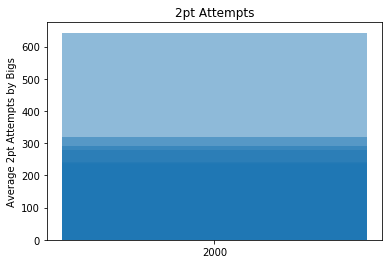

In [174]:
#Creating the bar plot to show 2pt attempts over the years
height_in_order = [267.2375062468766,393.37733605164794,329.96759711106773,
                  462.3820478586834,239.6020472440945,264.6746556473829,
                  198.58414112987285,326.7104401898216,202.4394495688039,
                  317.15172735760973,358.1092259765157,340.2185962081484,
                  138.65003898331514,310.9502976190476,291.8668918918919,
                  259.16416083916084,231.6014598146951,263.58414516248973]
years = ('2000','2001','2002','2003','2004','2005','2006','2007','2008',
         '2009','2010','2011','2012',
        '2013','2014','2015','2016','2017')
x_pos_2 = 'years'
width = .5

plt.bar('years', height, alpha = .5)
plt.xticks(x_pos_2, years)
plt.ylabel("Average 2pt Attempts by Bigs")
plt.title("2pt Attempts")

plt.show()